In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
ruta = '../scrapy_project/resultados.json'

In [6]:
df = pd.read_json(ruta)
df.head(5)

,location,date,edicion,distancia,posicion,nombre,sexo,categoria,tiempo
0,A Coruña,2010-12-31,2010,7.5 km,1,Jose Manuel Vieito Vilacoba,Hombre,Categoría Desconocida,00:23:50
1,A Coruña,2010-12-31,2010,7.5 km,2,Juan Luis Trillo Caamaño,Hombre,Categoría Desconocida,00:24:21
2,A Coruña,2010-12-31,2010,7.5 km,3,Manuel Oliver Perez Lopez,Hombre,Categoría Desconocida,00:24:49
3,A Coruña,2010-12-31,2010,7.5 km,4,Javier Tourís Fornos,Hombre,Categoría Desconocida,00:25:40
4,A Coruña,2010-12-31,2010,7.5 km,5,Angel Maceiras Lago,Hombre,Categoría Desconocida,00:25:55


Conversión tiempo a segundos

In [7]:
def hh_mm_ss_to_sec(t):
    h,m,s = map(int,t.split(':'))
    return h*3600 + m*60 + s
df['tiempo_segundos'] = df['tiempo'].apply(hh_mm_ss_to_sec)

Limpiar km en distancia

In [10]:
df['distancia_km'] = df['distancia'].str.replace('km','').astype(float)
df.head(5)

,location,date,edicion,distancia,posicion,nombre,sexo,categoria,tiempo,tiempo_segundos,distancia_km
0,A Coruña,2010-12-31,2010,7.5 km,1,Jose Manuel Vieito Vilacoba,Hombre,Categoría Desconocida,00:23:50,1430,7.5
1,A Coruña,2010-12-31,2010,7.5 km,2,Juan Luis Trillo Caamaño,Hombre,Categoría Desconocida,00:24:21,1461,7.5
2,A Coruña,2010-12-31,2010,7.5 km,3,Manuel Oliver Perez Lopez,Hombre,Categoría Desconocida,00:24:49,1489,7.5
3,A Coruña,2010-12-31,2010,7.5 km,4,Javier Tourís Fornos,Hombre,Categoría Desconocida,00:25:40,1540,7.5
4,A Coruña,2010-12-31,2010,7.5 km,5,Angel Maceiras Lago,Hombre,Categoría Desconocida,00:25:55,1555,7.5


Metricas de desempeño

In [11]:
avg_time_category = df.groupby('categoria')['tiempo_segundos'].mean()/60 
print(f"Tiempo promedio por categoria (minutos): {avg_time_category}")

Tiempo promedio por categoria (minutos): categoria
Categoría Desconocida    38.488238
DINTF                    75.410000
DINTM                    53.122222
DVISF                    62.677778
DVISM                    44.852222
JV1F                     52.048020
JV1M                     43.491281
JV2F                     50.875779
JV2M                     39.616451
JVF                      42.836863
JVM                      36.113149
NO                       54.934375
PROMESA FEMENINA         39.040625
PROMESA MASCULINO        34.376923
SENIOR FEMENINA          41.679128
SENIOR MASCULINO         34.157891
SILLAF                   49.546667
SILLAM                   46.509259
SNF                      49.671402
SNM                      41.068098
VETERANAS A FEM          41.025257
VETERANAS B FEM          40.165972
VETERANAS C FEM          41.034921
VETERANOS A MASC         34.556807
VETERANOS B MASC         34.354320
VETERANOS C MASC         35.733176
VETERANOS D FEM          41.005556
VETE

In [13]:
avg_time_gender = df.groupby('sexo')['tiempo_segundos'].mean()/60
print(f"Tiempo promedio por genero (minutos): {avg_time_gender}")

Tiempo promedio por genero (minutos): sexo
Desconocido    52.278889
Hombre         40.746218
Mujer          49.714816
Name: tiempo_segundos, dtype: float64


Analisis de tendencias

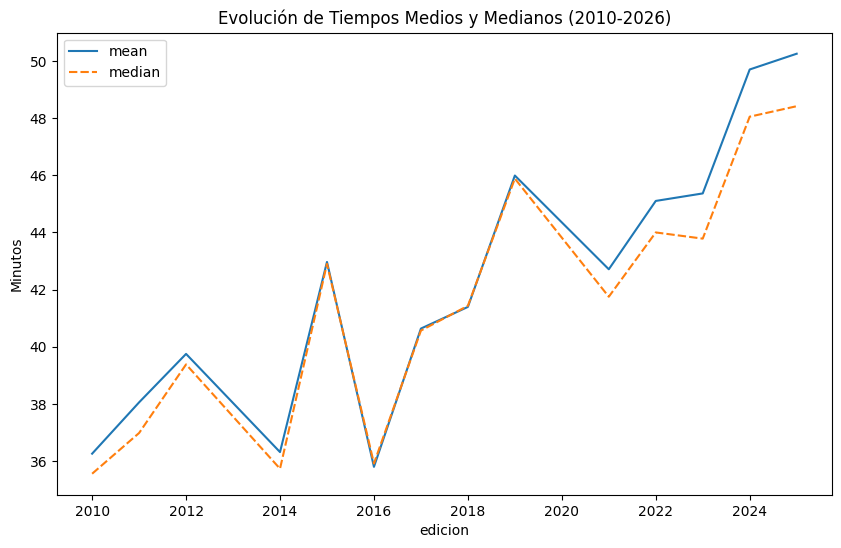

In [18]:
participacion_anual = df.groupby('edicion').size

#Evolución de tiempos (Media y Mediana)
tiempos_evolucion = df.groupby('edicion')['tiempo_segundos'].agg(['mean', 'median', 'min', 'max']) / 60

plt.figure(figsize=(10, 6))
sns.lineplot(data=tiempos_evolucion[['mean', 'median']])
plt.title('Evolución de Tiempos Medios y Medianos (2010-2026)')
plt.ylabel('Minutos')
plt.show()


Mejores actuaciones

In [26]:
top_runners = df.groupby('nombre').agg({
    'tiempo_segundos': 'mean',
    'posicion': 'count' 
}).rename(columns={'posicion': 'participaciones'})

mejores_habituales = top_runners[top_runners['participaciones'] >= 3].sort_values('tiempo_segundos')
mejores_habituales.head(10)

,tiempo_segundos,participaciones
nombre,,
Luis Pérez Varela,1301.600000,5
Alberto Castiñeira Figueroa,1306.750000,4
Abdelaziz Fatihi Chhima,1343.666667,3
Alvaro Presedo Fraguío,1344.250000,4
Diego Crespo Naya,1347.000000,3
Fernando Díez Gomez,1362.000000,4
Juan Carlos Gomez Edreira,1366.000000,3
Pablo Bocelo Bellas,1374.142857,7
Andres Prieto Villar,1374.750000,4


Calcular el ritmo

$$Pace = \frac{Tiempo\_Segundos / 60}{Distancia\_km}$$

In [25]:
df['ritmo_min_km'] = (df['tiempo_segundos'] / 60) / df['distancia_km']
df.head(5)

,location,date,edicion,distancia,posicion,nombre,sexo,categoria,tiempo,tiempo_segundos,distancia_km,ritmo_min_km
0,A Coruña,2010-12-31,2010,7.5 km,1,Jose Manuel Vieito Vilacoba,Hombre,Categoría Desconocida,00:23:50,1430,7.5,3.177778
1,A Coruña,2010-12-31,2010,7.5 km,2,Juan Luis Trillo Caamaño,Hombre,Categoría Desconocida,00:24:21,1461,7.5,3.246667
2,A Coruña,2010-12-31,2010,7.5 km,3,Manuel Oliver Perez Lopez,Hombre,Categoría Desconocida,00:24:49,1489,7.5,3.308889
3,A Coruña,2010-12-31,2010,7.5 km,4,Javier Tourís Fornos,Hombre,Categoría Desconocida,00:25:40,1540,7.5,3.422222
4,A Coruña,2010-12-31,2010,7.5 km,5,Angel Maceiras Lago,Hombre,Categoría Desconocida,00:25:55,1555,7.5,3.455556


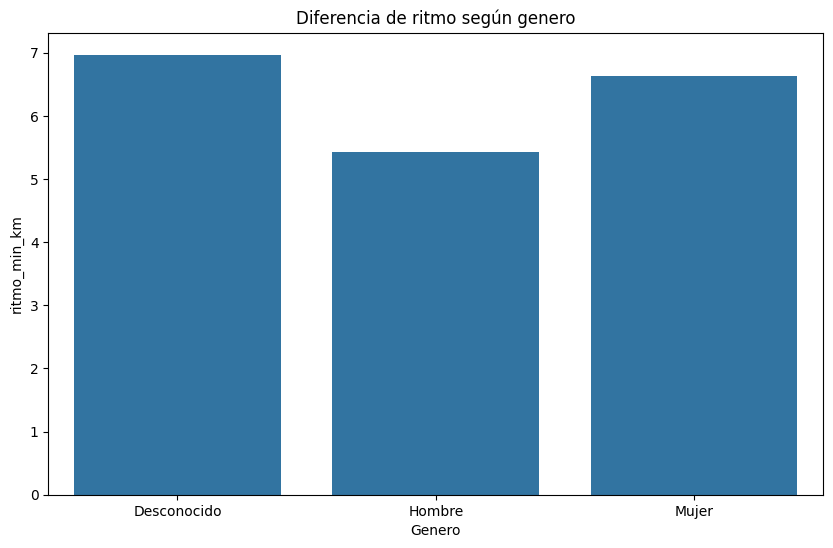

sexo
Desconocido    6.970519
Hombre         5.432829
Mujer          6.628642
Name: ritmo_min_km, dtype: float64

In [32]:
avg_time_gender_pace = df.groupby('sexo')['ritmo_min_km'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_time_gender_pace)
plt.title('Diferencia de ritmo según genero')
plt.xlabel('Genero')
plt.show()
avg_time_gender_pace

Summary report

# Fase 3: Analisis de Datos - San Silvestre Coruña (2010-2026)

Este modulo contiene el procesamiento y analisis estadistico de los resultados de la carrera San Silvestre Coruña recolectados en las fases anteriores. El objetivo es extraer tendencias de participacion y rendimiento a lo largo de 16 años de historia.

## 1. Resumen de Hallazgos
Los datos revelan una transformacion profunda de la carrera: el evento ha evolucionado de ser una competicion de nicho para atletas locales a convertirse en un fenomeno social masivo e inclusivo.

* **Evolucion del Tiempo Medio**: En 2010, el tiempo medio era de aproximadamente 36 minutos. En las ediciones de 2024-2025, este valor ha ascendido a los 50 minutos.
* **Democratizacion**: El incremento en los tiempos medios indica una mayor incorporacion de corredores amateurs y no tanto profesional.

## 2. Metricas de Rendimiento
### Ritmo Promedio por Genero (Pace)
El analisis del ritmo medio (min/km) muestra la siguiente distribucion:

| Genero | Ritmo Medio (min/km) | Tiempo Total Promedio |
| :--- | :--- | :--- |
| Hombres | 5.43 | 40.75 min |
| Mujeres | 6.63 | 49.71 min |
| Desconocido | 6.97 | 52.28 min |

### Top 5: Corredores mas Constantes
Atletas identificados por su velocidad y fidelidad a la prueba (minimo 3 participaciones):

1. **Luis Perez Varela**: 1301.60s (~21.7 min) | 5 ediciones
2. **Alberto Castiñeira Figueroa**: 1306.75s (~21.8 min) | 4 ediciones
3. **Abdelaziz Fatihi Chhima**: 1343.67s (~22.4 min) | 3 ediciones
4. **Alvaro Presedo Fraguio**: 1344.25s (~22.4 min) | 4 ediciones
5. **Diego Crespo Naya**: 1347.00s (~22.5 min) | 3 ediciones

## 3. Analisis por Categorias
El rendimiento varia significativamente segun el rango de edad y la categoria:

* **Categorias mas rapidas**: Senior Masculino (34.16 min) y Promesa Masculino (34.38 min).
* **Veteranos de Elite**: Los grupos Veteranos A y B Masculinos mantienen promedios de 34.5 min.
* **Inclusividad**: Se registran tiempos en categorias de diversidad funcional (DINT/DVIS) y Silla de ruedas, con promedios entre 44 y 75 minutos.

## 4. Conclusiones Tecnicas
1. **Fidelizacion**: Se observa un nucleo solido de corredores locales con participacion recurrente.
2. **Brecha de Rendimiento**: La diferencia entre tiempos minimos y maximos aumenta anualmente, confirmando la apertura del evento a todos los publicos y no solo a perfiles mas profesionales